In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
!gdown --id 1dsXb5b3nrv5tGSc7gFobqIeGhGrfsOkz ## Download data from drive

Downloading...
From: https://drive.google.com/uc?id=1dsXb5b3nrv5tGSc7gFobqIeGhGrfsOkz
To: /content/term-deposit-marketing-2020.csv
2.79MB [00:00, 87.6MB/s]


In [3]:
all_data = pd.read_csv('/content/term-deposit-marketing-2020.csv') # Import dataset
y_output = all_data['y'] ## Output
all_data = all_data.drop('y', axis = 1) ## Input
y_output = y_output.to_frame()
y_output = y_output.rename(columns = {"y": "Subscribed"}) ## Rename output Column

In [4]:
all_data.head() ## Take a peek to the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1


In [5]:
# Convert categorical output to binary output
y_binary = pd.get_dummies(y_output["Subscribed"])  
y_binary = y_binary.drop(columns="no", axis = 1) ## Drop no categorical value and use yes categorical value.
y_binary = y_binary.rename(columns={"yes" : "Subscribed"}) ## Rename it so that we can easily understand 0 means Not subscribed 1 means subscribed
y_output = y_binary
y_output

,Subscribed
0,0
1,0
2,0
3,0
4,0
...,...
39995,0
39996,1
39997,1
39998,0


In [6]:
df = pd.read_csv('/content/term-deposit-marketing-2020.csv') ## Compare feature dataframe
df = df.drop(['y'], axis = 1)
df['Subscribed'] = y_binary
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


# Feature Selection 

In [7]:
df.groupby('marital')['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering their marriage status

marital   Subscribed
divorced  0             91.724868
          1              8.275132
married   0             93.939145
          1              6.060855
single    0             90.568464
          1              9.431536
Name: Subscribed, dtype: float64

In [8]:
df['marital'].isnull().values.any() ## Check if any NaN value

False

In [9]:
df.groupby('housing')['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering their housing status

housing  Subscribed
no       0             91.032626
         1              8.967374
yes      0             93.907869
         1              6.092131
Name: Subscribed, dtype: float64

In [10]:
df['housing'].isnull().values.any() ## Check if any NaN value

False

In [11]:
df.groupby('loan')['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering their loan status

loan  Subscribed
no    0             92.391896
      1              7.608104
yes   0             94.516595
      1              5.483405
Name: Subscribed, dtype: float64

In [12]:
df['loan'].isnull().values.any() ## Check if any NaN value

False

In [13]:
df.groupby('contact')['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering their contact status

contact    Subscribed
cellular   0             91.037168
           1              8.962832
telephone  0             92.847910
           1              7.152090
unknown    0             96.106541
           1              3.893459
Name: Subscribed, dtype: float64

In [14]:
df.groupby('job')['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering their job

job            Subscribed
admin          0             92.170422
               1              7.829578
blue-collar    0             94.298199
               1              5.701801
entrepreneur   0             93.736655
               1              6.263345
housemaid      0             95.124195
               1              4.875805
management     0             91.721773
               1              8.278227
retired        0             89.491997
               1             10.508003
self-employed  0             92.079208
               1              7.920792
services       0             93.913043
               1              6.086957
student        0             84.351145
               1             15.648855
technician     0             92.746643
               1              7.253357
unemployed     0             91.304348
               1              8.695652
unknown        0             92.765957
               1              7.234043
Name: Subscribed, dtype: float64

In [15]:
df.groupby('default')['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering their default status

default  Subscribed
no       0             92.735577
         1              7.264423
yes      0             93.943140
         1              6.056860
Name: Subscribed, dtype: float64

In [16]:
df.groupby(['education', 'marital'])['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering their education-marital status

education  marital   Subscribed
primary    divorced  0             90.644172
                     1              9.355828
           married   0             95.244003
                     1              4.755997
           single    0             92.071611
                     1              7.928389
secondary  divorced  0             92.501913
                     1              7.498087
           married   0             94.171975
                     1              5.828025
           single    0             91.579309
                     1              8.420691
tertiary   divorced  0             90.660592
                     1              9.339408
           married   0             92.382064
                     1              7.617936
           single    0             88.457584
                     1             11.542416
unknown    divorced  0             92.253521
                     1              7.746479
           married   0             94.046418
                     1 

In [17]:
df.groupby(['month'])['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering  month 

month  Subscribed
apr    0             83.406917
       1             16.593083
aug    0             94.477469
       1              5.522531
dec    0             92.307692
       1              7.692308
feb    0             88.893728
       1             11.106272
jan    0             96.768707
       1              3.231293
jul    0             93.981191
       1              6.018809
jun    0             93.789607
       1              6.210393
mar    0             51.550388
       1             48.449612
may    0             94.154597
       1              5.845403
nov    0             93.885492
       1              6.114508
oct    1             61.250000
       0             38.750000
Name: Subscribed, dtype: float64

In [18]:
df.groupby(['day'])['Subscribed'].value_counts(normalize = True) * 100 ## Percentage of customers whose subscribed or not, considering day 

day  Subscribed
1    0             77.272727
     1             22.727273
2    0             90.622182
     1              9.377818
3    0             90.846682
                     ...    
29   1              3.062500
30   0             84.625944
     1             15.374056
31   0             95.600677
     1              4.399323
Name: Subscribed, Length: 62, dtype: float64

In [19]:
df['Subscribed'].value_counts()  ## Imbalanced Dataset

0    37104
1     2896
Name: Subscribed, dtype: int64

# Convert categorical variables to columns using One-Hot Encoding

In [20]:
## First check any missing value in the columns
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
Subscribed    0
dtype: int64

In [21]:
## Get dummy columns of each categorical value
# I will handle housing, loan and default (all of them yes or no). They are all binary categories. So we dont need extra column. All we need to have 1 or 0 in that column
colmns = ['job', 'marital', 'education', 'contact', 'month']
cat_col = pd.get_dummies(df[colmns], drop_first = False) #

In [22]:
## Convert yes or no features to binary values.
default_bin = pd.get_dummies(df["default"])  
default_bin = default_bin.drop(columns="no", axis = 1) 
default_bin = default_bin.rename(columns={"yes" : "default"}) 
housing_bin = pd.get_dummies(df["housing"])  
housing_bin = housing_bin.drop(columns="no", axis = 1)
housing_bin = housing_bin.rename(columns={"yes" : "housing"}) 
loan_bin = pd.get_dummies(df["loan"])  
loan_bin = loan_bin.drop(columns="no", axis = 1) 
loan_bin = loan_bin.rename(columns={"yes" : "loan"}) 

In [23]:
bin_vals = pd.concat([cat_col,default_bin, housing_bin, loan_bin], axis = 1)

In [24]:
bin_vals 

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,default,housing,loan
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39996,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39997,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39998,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
all_data = all_data.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'], axis = 1)
all_data = pd.concat([all_data, bin_vals], axis = 1)

In [26]:
all_data ## 41 Features dataset in the end

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,default,housing,loan
0,58,2143,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,33,2,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,47,1506,5,92,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39996,30,3340,3,238,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39997,54,200,3,170,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39998,34,1047,3,342,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
# Split data into training and test set
X , y = all_data.to_numpy() , y_output.to_numpy() ## Convert dataframe to NumPy
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31) ## 0.2 Test data , 0.8 Training data

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) ## Data in NumPy form.
X_test = scaler.transform(X_test) # Transform test set

# Logistic regression to fit the data then use cross_val_score with 5-fold for Model evaluation

In [29]:
log_reg = LogisticRegression().fit(X_train,y_train.ravel())
scores = cross_val_score(log_reg, X_train, y_train.ravel(), cv = 5)

In [30]:
print(f'5-fold CV average accuracy is = {round(scores.mean() * 100,2)}%')
for turn, score in enumerate(scores, 1) :
  print(f'{turn}. model accuracy is {round(score * 100,2)}%')


5-fold CV average accuracy is = 93.34%
1. model accuracy is 93.61%
2. model accuracy is 93.38%
3. model accuracy is 93.14%
4. model accuracy is 93.58%
5. model accuracy is 93.0%


Average accuracy indicates that our model has generalized the data very well. Now let us evaluate the model using test set.

In [31]:
print(f'Accuracy on the test data is {round(log_reg.score(X_test,y_test.ravel())* 100, 2)}%')

Accuracy on the test data is 94.04%


Data distribution is imbalanced. That affects regression model's decision making. (Can be biased towards negative). Now let us test how many false negatives exist caused by bias problem. Let us check confusion matrix

In [32]:
predictions = log_reg.predict(X_test)
score = log_reg.score(X_test, y_test.ravel())

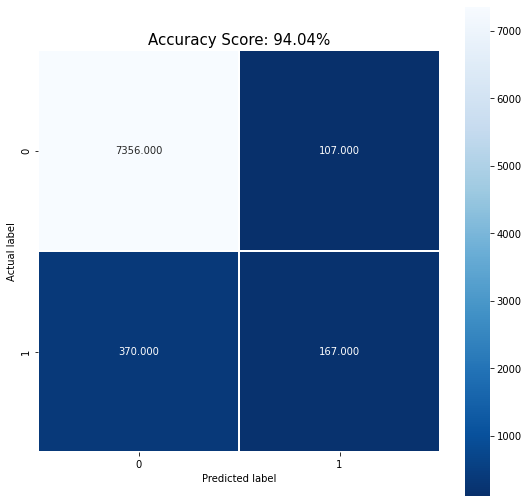

In [33]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score * 100,2))
plt.title(all_sample_title, size = 15);

 Model has many false negative samples. It could distinguish only small percent of positive samples because there is a bias towards "0" since dataset is imbalanced. Lower than 10%  (≈7.8%) percent of the dataset indicates information about customers who are subscribed to term deposit.

In [34]:
success_rate = 167 / (167+370) * 100
print(f'Accuracy rate of positive samples is {round(success_rate,3)}%')

Accuracy rate of positive samples is 31.099%


# Logistic Regression with Class weight to handle Imbalanced Data

In [35]:
log_reg_weighted = LogisticRegression(class_weight='balanced').fit(X_train, y_train.ravel()) ## Balanced ClassWeight
scores = cross_val_score(log_reg_weighted, X_train, y_train.ravel(), cv = 5)

In [36]:
print(f'5-fold CV average accuracy is = {round(scores.mean() * 100,2)}%')
for turn, score in enumerate(scores, 1) :
  print(f'{turn}. model accuracy is {round(score * 100,2)}%')


5-fold CV average accuracy is = 86.57%
1. model accuracy is 86.97%
2. model accuracy is 86.3%
3. model accuracy is 87.09%
4. model accuracy is 86.64%
5. model accuracy is 85.84%


In [37]:
predictions = log_reg_weighted.predict(X_test)
score = log_reg_weighted.score(X_test, y_test.ravel())

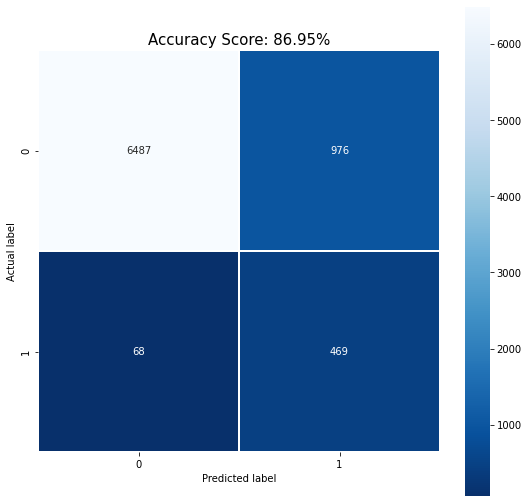

In [38]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f",linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(score*100)
plt.title(all_sample_title, size = 15);

In [39]:
true_pos_rate = round(469/(469+68) * 100,2)
print(f'True positive rate is {true_pos_rate}%')

True positive rate is 87.34%



Utilizing class weights, overall accuracy reduces, but false negative number decreases. In our case, identifying positive customers is more important, so class weights is an option to use. 
#What happens under the hood?

In logistic regression, we calculate loss per example using binary cross-entropy:

Loss = −ylog(p) − (1−y)log(1−p)


In this particular form, we give equal weight to both the positive and the negative classes. When we set class_weight as class_weight = {0:1,1:20}, the classifier in the background tries to minimize:

NewLoss = −20*ylog(p) − 1*(1−y)log(1−p)

Check : https://www.kdnuggets.com/2020/015-most-useful-techniques-handle-imbalanced-datasets.html

Can we decrease the number of false negative further?


# Neural Network approach

In [40]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import sklearn
from sklearn.metrics import confusion_matrix

In [41]:
METRICS = [ ## Model evaluation metrics
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          32, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(
          32, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
    
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [42]:
EPOCHS = 150
BATCH_SIZE = 1024

early_stopping = tf.keras.callbacks.EarlyStopping( ## Callback regarding validation AUC performance
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

Since dataset is imbalanced, initial bias setting is an option so that the model will give much more reasonable initial guesses.
The correct bias to set can be derived from:

bias = $log( N_(pos) / N_(neg)) $


In [43]:
pos = len(np.where(y_train == 1)[0])
neg =  len(np.where(y_train == 0)[0])
total = pos + neg
initial_bias = np.log(pos/neg)

In [44]:
model = make_model(output_bias =initial_bias)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Scaling by total/2 helps keep the loss to a similar magnitude. Just like in the logistic regression example.

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.54
Weight for class 1: 6.78


In [46]:


history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_split = 0.2,
    class_weight=class_weight)

Epoch 1/150
25/25 [==============================] - 3s 56ms/step - loss: 1.2938 - tp: 120.6154 - fp: 870.1538 - tn: 11900.3462 - fn: 893.5000 - accuracy: 0.8803 - precision: 0.1199 - recall: 0.1013 - auc: 0.5281 - val_loss: 0.3486 - val_tp: 60.0000 - val_fp: 211.0000 - val_tn: 5730.0000 - val_fn: 399.0000 - val_accuracy: 0.9047 - val_precision: 0.2214 - val_recall: 0.1307 - val_auc: 0.6274
Epoch 2/150
25/25 [==============================] - 0s 10ms/step - loss: 0.9202 - tp: 357.8846 - fp: 2670.2692 - tn: 10097.6923 - fn: 658.7692 - accuracy: 0.7676 - precision: 0.1189 - recall: 0.3392 - auc: 0.5857 - val_loss: 0.4519 - val_tp: 157.0000 - val_fp: 731.0000 - val_tn: 5210.0000 - val_fn: 302.0000 - val_accuracy: 0.8386 - val_precision: 0.1768 - val_recall: 0.3420 - val_auc: 0.7069
Epoch 3/150
25/25 [==============================] - 0s 10ms/step - loss: 0.8358 - tp: 478.7308 - fp: 3319.9231 - tn: 9425.2308 - fn: 560.7308 - accuracy: 0.7182 - precision: 0.1282 - recall: 0.4577 - auc: 0.63

In [47]:
train_predictions_weighted = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = model.predict(X_test, batch_size=BATCH_SIZE)

In [48]:
def plot_cm(labels, predictions, p=0.5): ## Plot Confusion Matrix
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @0.5 Threshold')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])
  print('Total Positives: ', np.sum(cm[1]))

In [49]:
def plot_roc(name, labels, predictions, **kwargs): ## Plot ROC curve
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()

loss :  0.3050418794155121
tp :  494.0
fp :  1129.0
tn :  6334.0
fn :  43.0
accuracy :  0.8535000085830688
precision :  0.3043746054172516
recall :  0.9199255108833313
auc :  0.946738064289093

True Negatives:  6334
False Positives:  1129
False Negatives:  43
True Positives:  494
Total Positives:  537


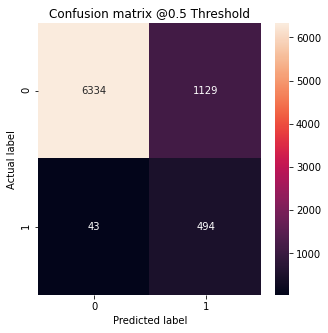

In [50]:
results = model.evaluate(X_test, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_weighted)

**Recall** is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Recall = True Positives / (True Positives + False Negatives)

A plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a range of candidate threshold values between 0.0 and 1.0 is known as a **ROC Curve**. It charts the false alarm rate against the hit rate, to put it another way. 
The ROC curve is useful for a variety of reasons: 
Different models' curves can be specifically compared in general or with different thresholds. 
The model's capability can be summed using the field under the curve in other words **AUC** (Area Under Curve).

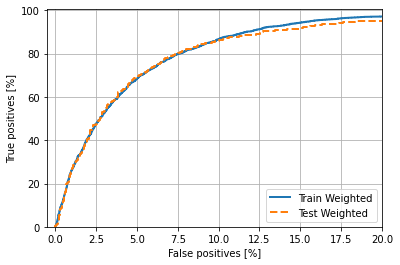

In [51]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("Train Weighted", y_train, train_predictions_weighted, color=colors[0])
plot_roc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

# Comparison between "Logistic Regression" and "Neural Net".

In [52]:
print(f'Recall of Logistic regression model is {true_pos_rate}%')
print(f'Recall of Neural net model is {round(results[7] * 100 , 3)}%')

Recall of Logistic regression model is 87.34%
Recall of Neural net model is 91.993%


Neural network gives better recall ratewhich allows us the find more appropriate customers 

# References


https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

# Bonus Questions

Which features are the most important?

In [53]:
importance = list(log_reg_weighted.coef_[0]) ## Coefficient of features
features =  list(all_data.columns.values) ## Feature names

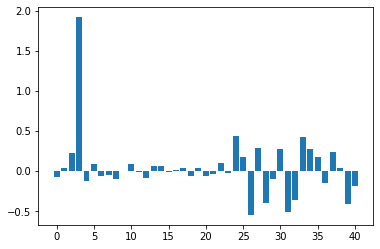

In [54]:
feature_score = []
for i in range(len(importance)) :
  feature_score.append([importance[i], features[i]])
plt.bar([x for x in range(len(importance))], importance) ## Pie bar of the features.
plt.show()

In [55]:
feature_score = sorted(feature_score, key=lambda x: abs(x[0]), reverse=True)

In [56]:
print("Most important 10 feature is: ")
for x in range(1,11) :
  print(f'{x}. {feature_score[x-1][1]} with score {round(feature_score[x-1][0],2)}')

Most important 10 feature is: 
1. duration with score 1.92
2. contact_unknown with score -0.55
3. month_jan with score -0.51
4. contact_cellular with score 0.44
5. month_jun with score 0.43
6. housing with score -0.41
7. month_aug with score -0.39
8. month_jul with score -0.36
9. month_apr with score 0.29
10. month_feb with score 0.28


In [57]:
print("Importance ranking of all features:")
for x in range(1,42) :
  print(f'{x}. {feature_score[x-1][1]} with score {round(feature_score[x-1][0],2)}')

Importance ranking of all features:
1. duration with score 1.92
2. contact_unknown with score -0.55
3. month_jan with score -0.51
4. contact_cellular with score 0.44
5. month_jun with score 0.43
6. housing with score -0.41
7. month_aug with score -0.39
8. month_jul with score -0.36
9. month_apr with score 0.29
10. month_feb with score 0.28
11. month_mar with score 0.27
12. month_oct with score 0.24
13. day with score 0.23
14. loan with score -0.18
15. month_may with score 0.18
16. contact_telephone with score 0.18
17. month_nov with score -0.15
18. campaign with score -0.13
19. education_tertiary with score 0.1
20. month_dec with score -0.1
21. job_retired with score 0.09
22. job_housemaid with score -0.09
23. job_admin with score 0.08
24. job_services with score -0.08
25. job_technician with score 0.07
26. age with score -0.07
27. job_student with score 0.06
28. marital_married with score -0.06
29. job_blue-collar with score -0.06
30. education_primary with score -0.06
31. marital_div

Positive values are features that increase customer subscription probability, while negative values are the opposite.

# What makes customers buy

**1- Duration :** The longer the salesman can keep the customer on the line, the higher the chances that he or she will subscribe to the term deposit. This is an expected situation. If the customer is already interested in the term deposit, he/she will ask more questions about it. The company can hire more salesman to take care of customers better.

**2-Contact type:** If the employee reaches out to potential customers via cellular phone, subscription to term deposit is more likely compared to other methods. There is also a positive impact of telephone contact but is not as high as cellular contact.

**3-Contact Month:** Reaching the potential customer in the appropriate month also stands out as a factor that helps the subscription process. Especially in the spring (March, April, May) and June months, while the customers reached are getting closer to subscribing, we see this situation reversing in January, August and July.

# Target Customer Group

1- No housing or personal loan

2- Tertiary education
3- Aim to retired, admin and technician workers

4- Target the younger people and younger segment in retired segment (Just retired maybe). 

5- Divorced or single people.

**All these inferences are interpreted in the order of importance scheme given above.**